# Imports and Setup

In [1]:
%load_ext autoreload
import os
import numpy as np

import instance_halos as ph

import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%matplotlib inline
# %matplotlib notebook
%load_ext autoreload
mpl.pyplot.style.use('default')
mpl.pyplot.close('all')

import logging
# logging.getLogger().setLevel(logging.INFO) # uncomment for some timing output
# logging.getLogger().setLevel(logging.DEBUG) # uncomment for a lot of output

ph.predictions.limit_tensorflow_GPU_memory(GPU_percent_mem_use=0.1)

2023-11-17 13:01:12.984994: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Limit GPU memory :  4776.911048000001 MB /  47769.11048 MB


2023-11-17 13:01:14.704563: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-11-17 13:01:14.705692: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-11-17 13:01:14.721980: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:d8:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.62GHz coreCount: 72 deviceMemorySize: 44.49GiB deviceMemoryBandwidth: 581.23GiB/s
2023-11-17 13:01:14.722018: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-11-17 13:01:14.723878: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-11-17 13:01:14.723934: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2023-1

# Load data

In [2]:
# global_data_path = os.path.abspath(os.path.join(ph.__path__[0], os.pardir))
global_data_path ="/dipc_storage/dlopez/Projects"

data_path = os.path.join(global_data_path, 'instance_halos_data')

simulation_name = "Planck13_N256_L50.0_output_seed1609"

delta = np.load(os.path.join(data_path, simulation_name, "linear_density_field.npy"))
potential = np.load(os.path.join(data_path, simulation_name, "linear_potential.npy"))
truth = np.load(os.path.join(data_path, simulation_name, "FoF_halos_cut_155.npy"))

### visualize data

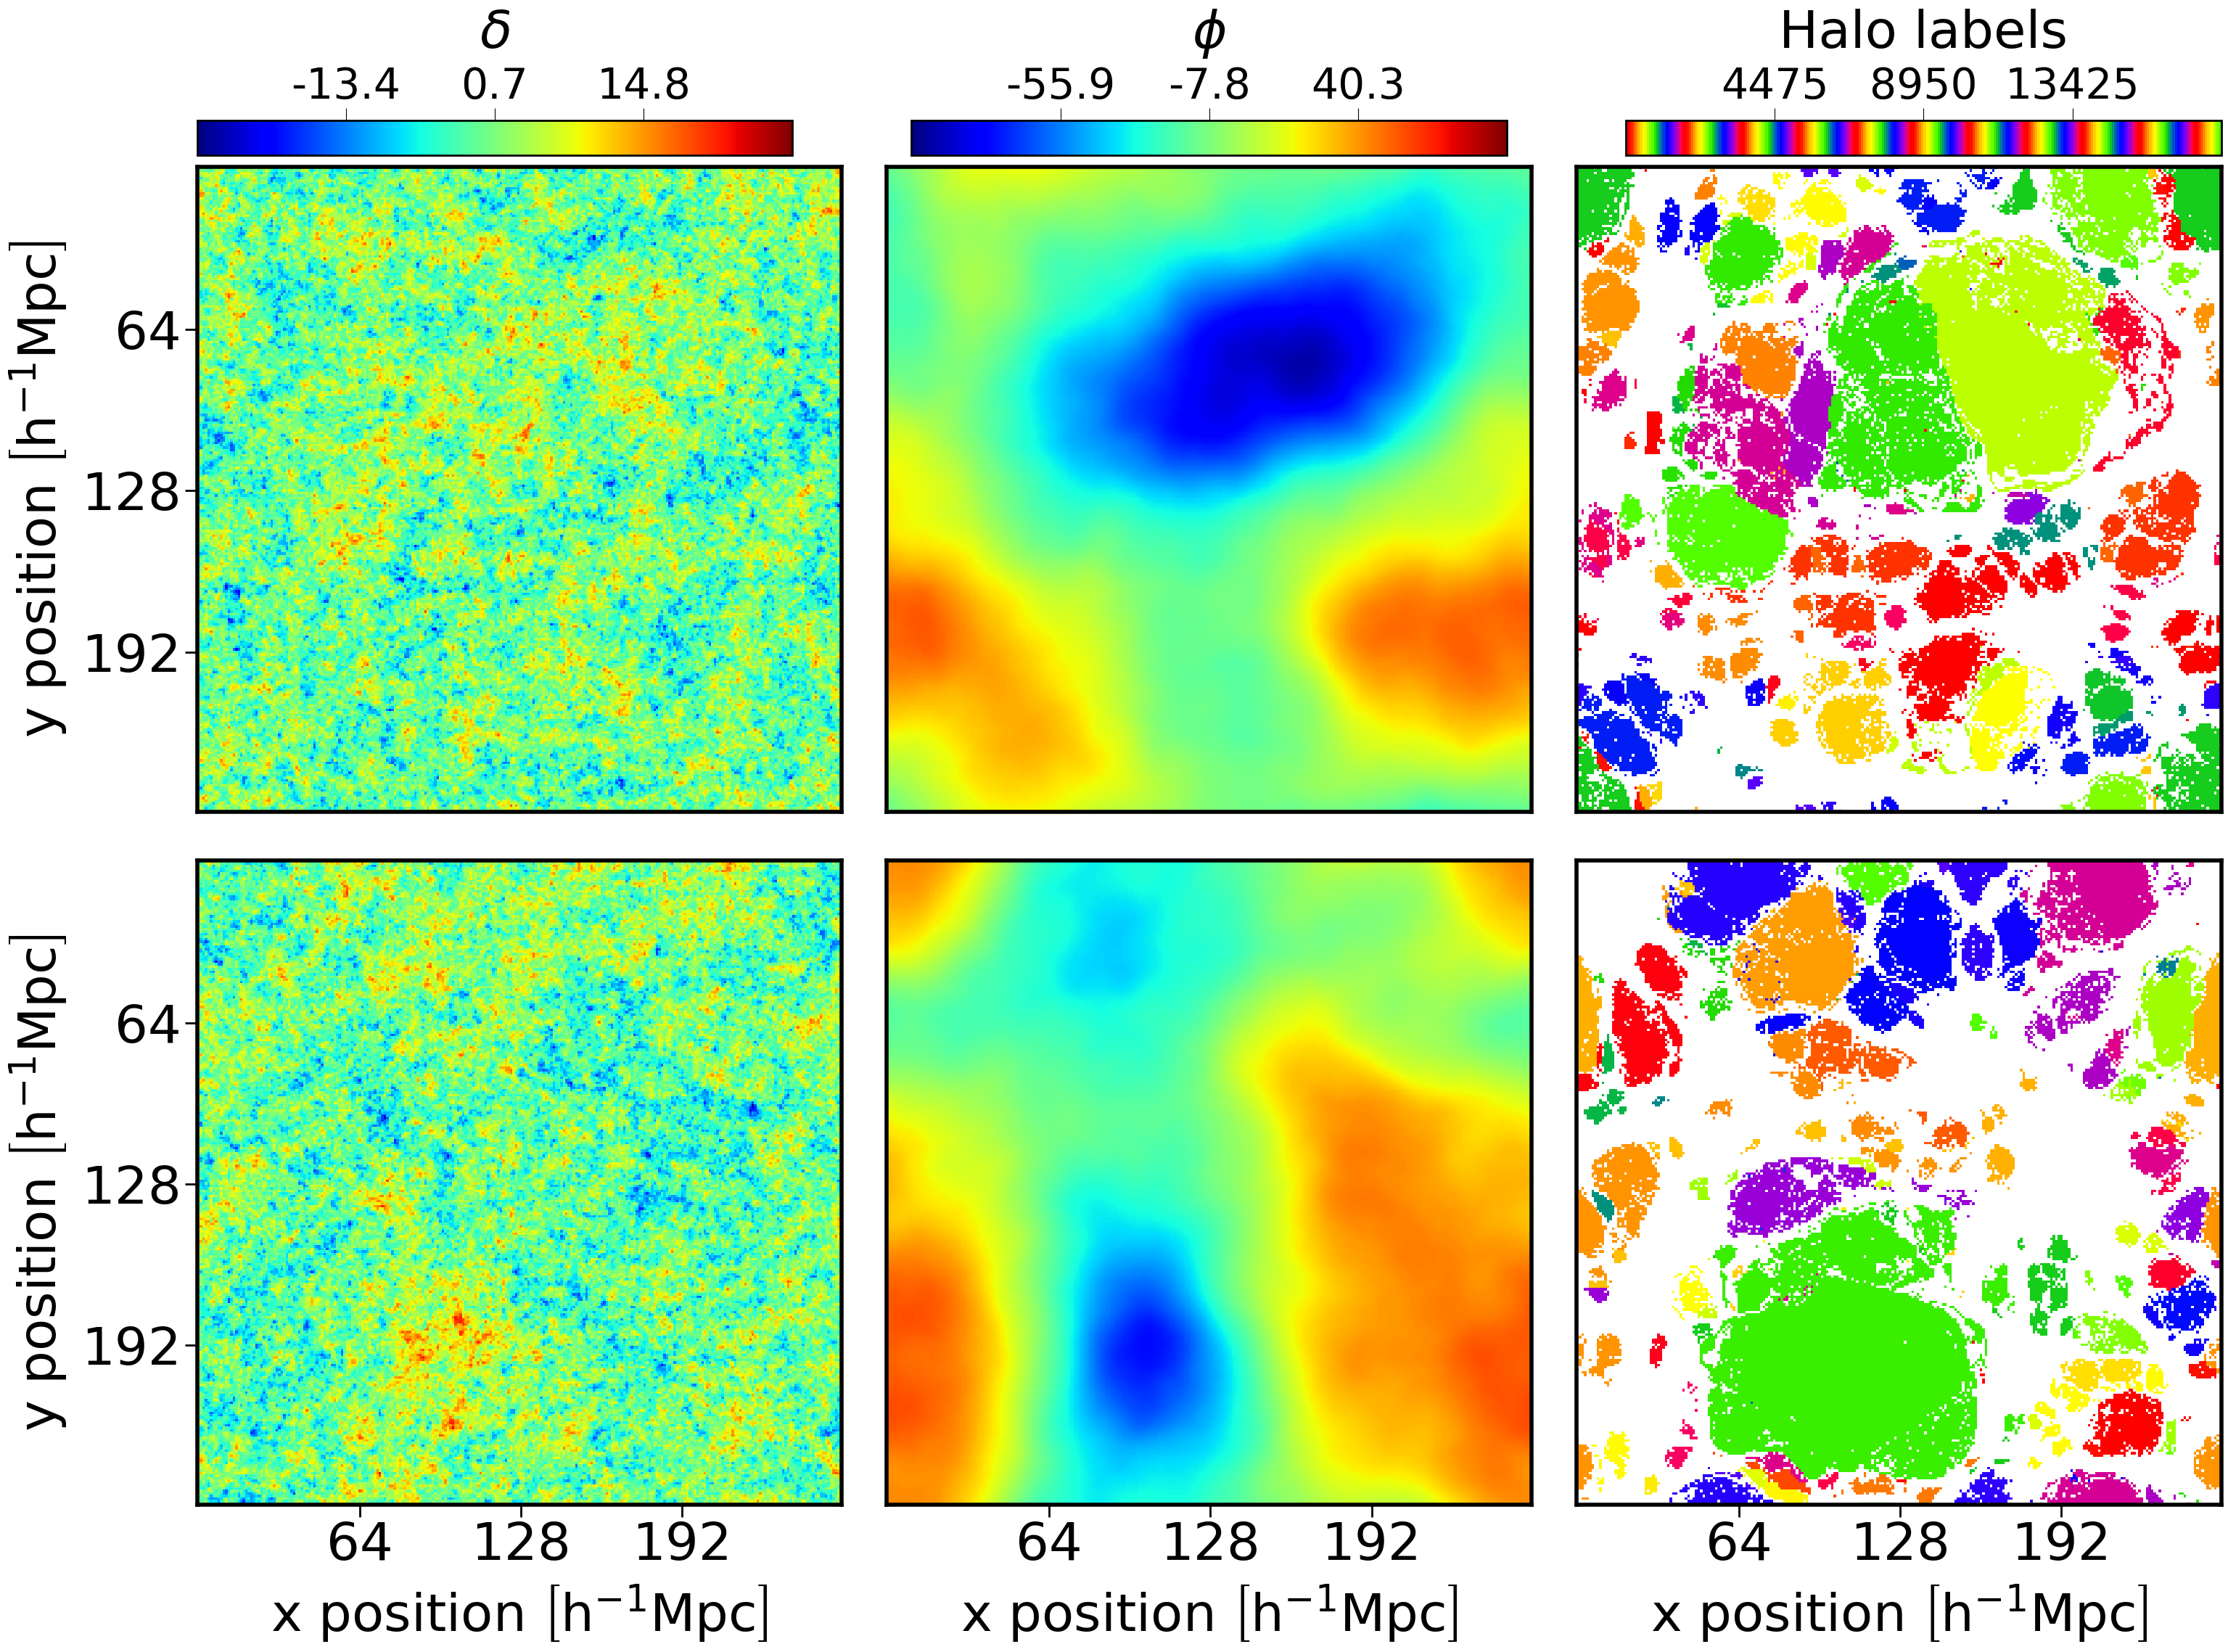

In [3]:
fig = ph.utils.plot_loaded_fields(delta, potential, truth)

# Panoptic predictions (Semantic & Instance)

In [4]:
semantic, instance = ph.predictions.panoptic_prediction(delta=delta, potential=potential, ngrid_out=64)

2023-11-17 13:01:17.130434: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-17 13:01:17.134387: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-11-17 13:01:17.135541: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:d8:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.62GHz coreCount: 72 deviceMemorySize: 44.49GiB deviceMemoryBandwidth: 581.23GiB/s
2023-11-17 13:01:17.135583: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-11-17 13:01:17.135606: I tensorflow/stream_executor/platform/def

2023-11-17 13:01:37.110139: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-11-17 13:01:37.110957: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2700000000 Hz
2023-11-17 13:01:37.477052: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2023-11-17 13:01:38.776167: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2023-11-17 13:01:39.013816: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-11-17 13:01:40.389026: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


# (Optional) Generate semantic and instance predictions separately

### Semantic predictions

In [5]:
# semantic = ph.predictions.semantic_prediction(delta=delta, potential=potential)

### Instance predictions

In [6]:
# instance = ph.predictions.instance_prediction(semantic, delta=delta, potential=potential)

# Evaluate semantic model results

### Visualize semantic metrics as a function of the semantic threshold

In [7]:
list_semantic_thresholds, semantic_metrics = ph.utils.semantic_predictions_metrics_vs_thresholds(
    truth.flatten().astype(bool),
    semantic.flatten()
)

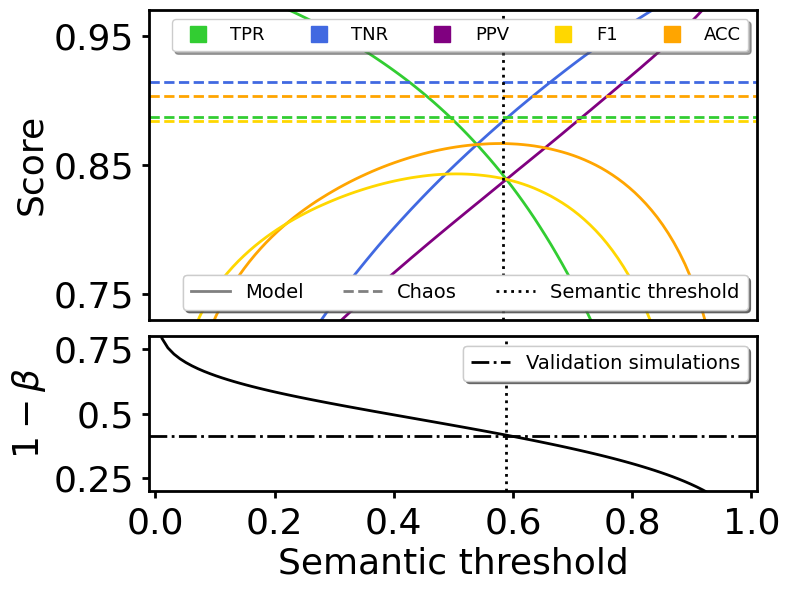

In [8]:
fig, semantic_threshold = ph.utils.plot_semantic_metrics_vs_semantic_threshold(
    list_semantic_thresholds,
    semantic_metrics,
    true_collapsed_fraction = np.sum(truth.flatten().astype(bool)) / len(truth.flatten().astype(bool))
)

### Visualize semantic predictions (map level)

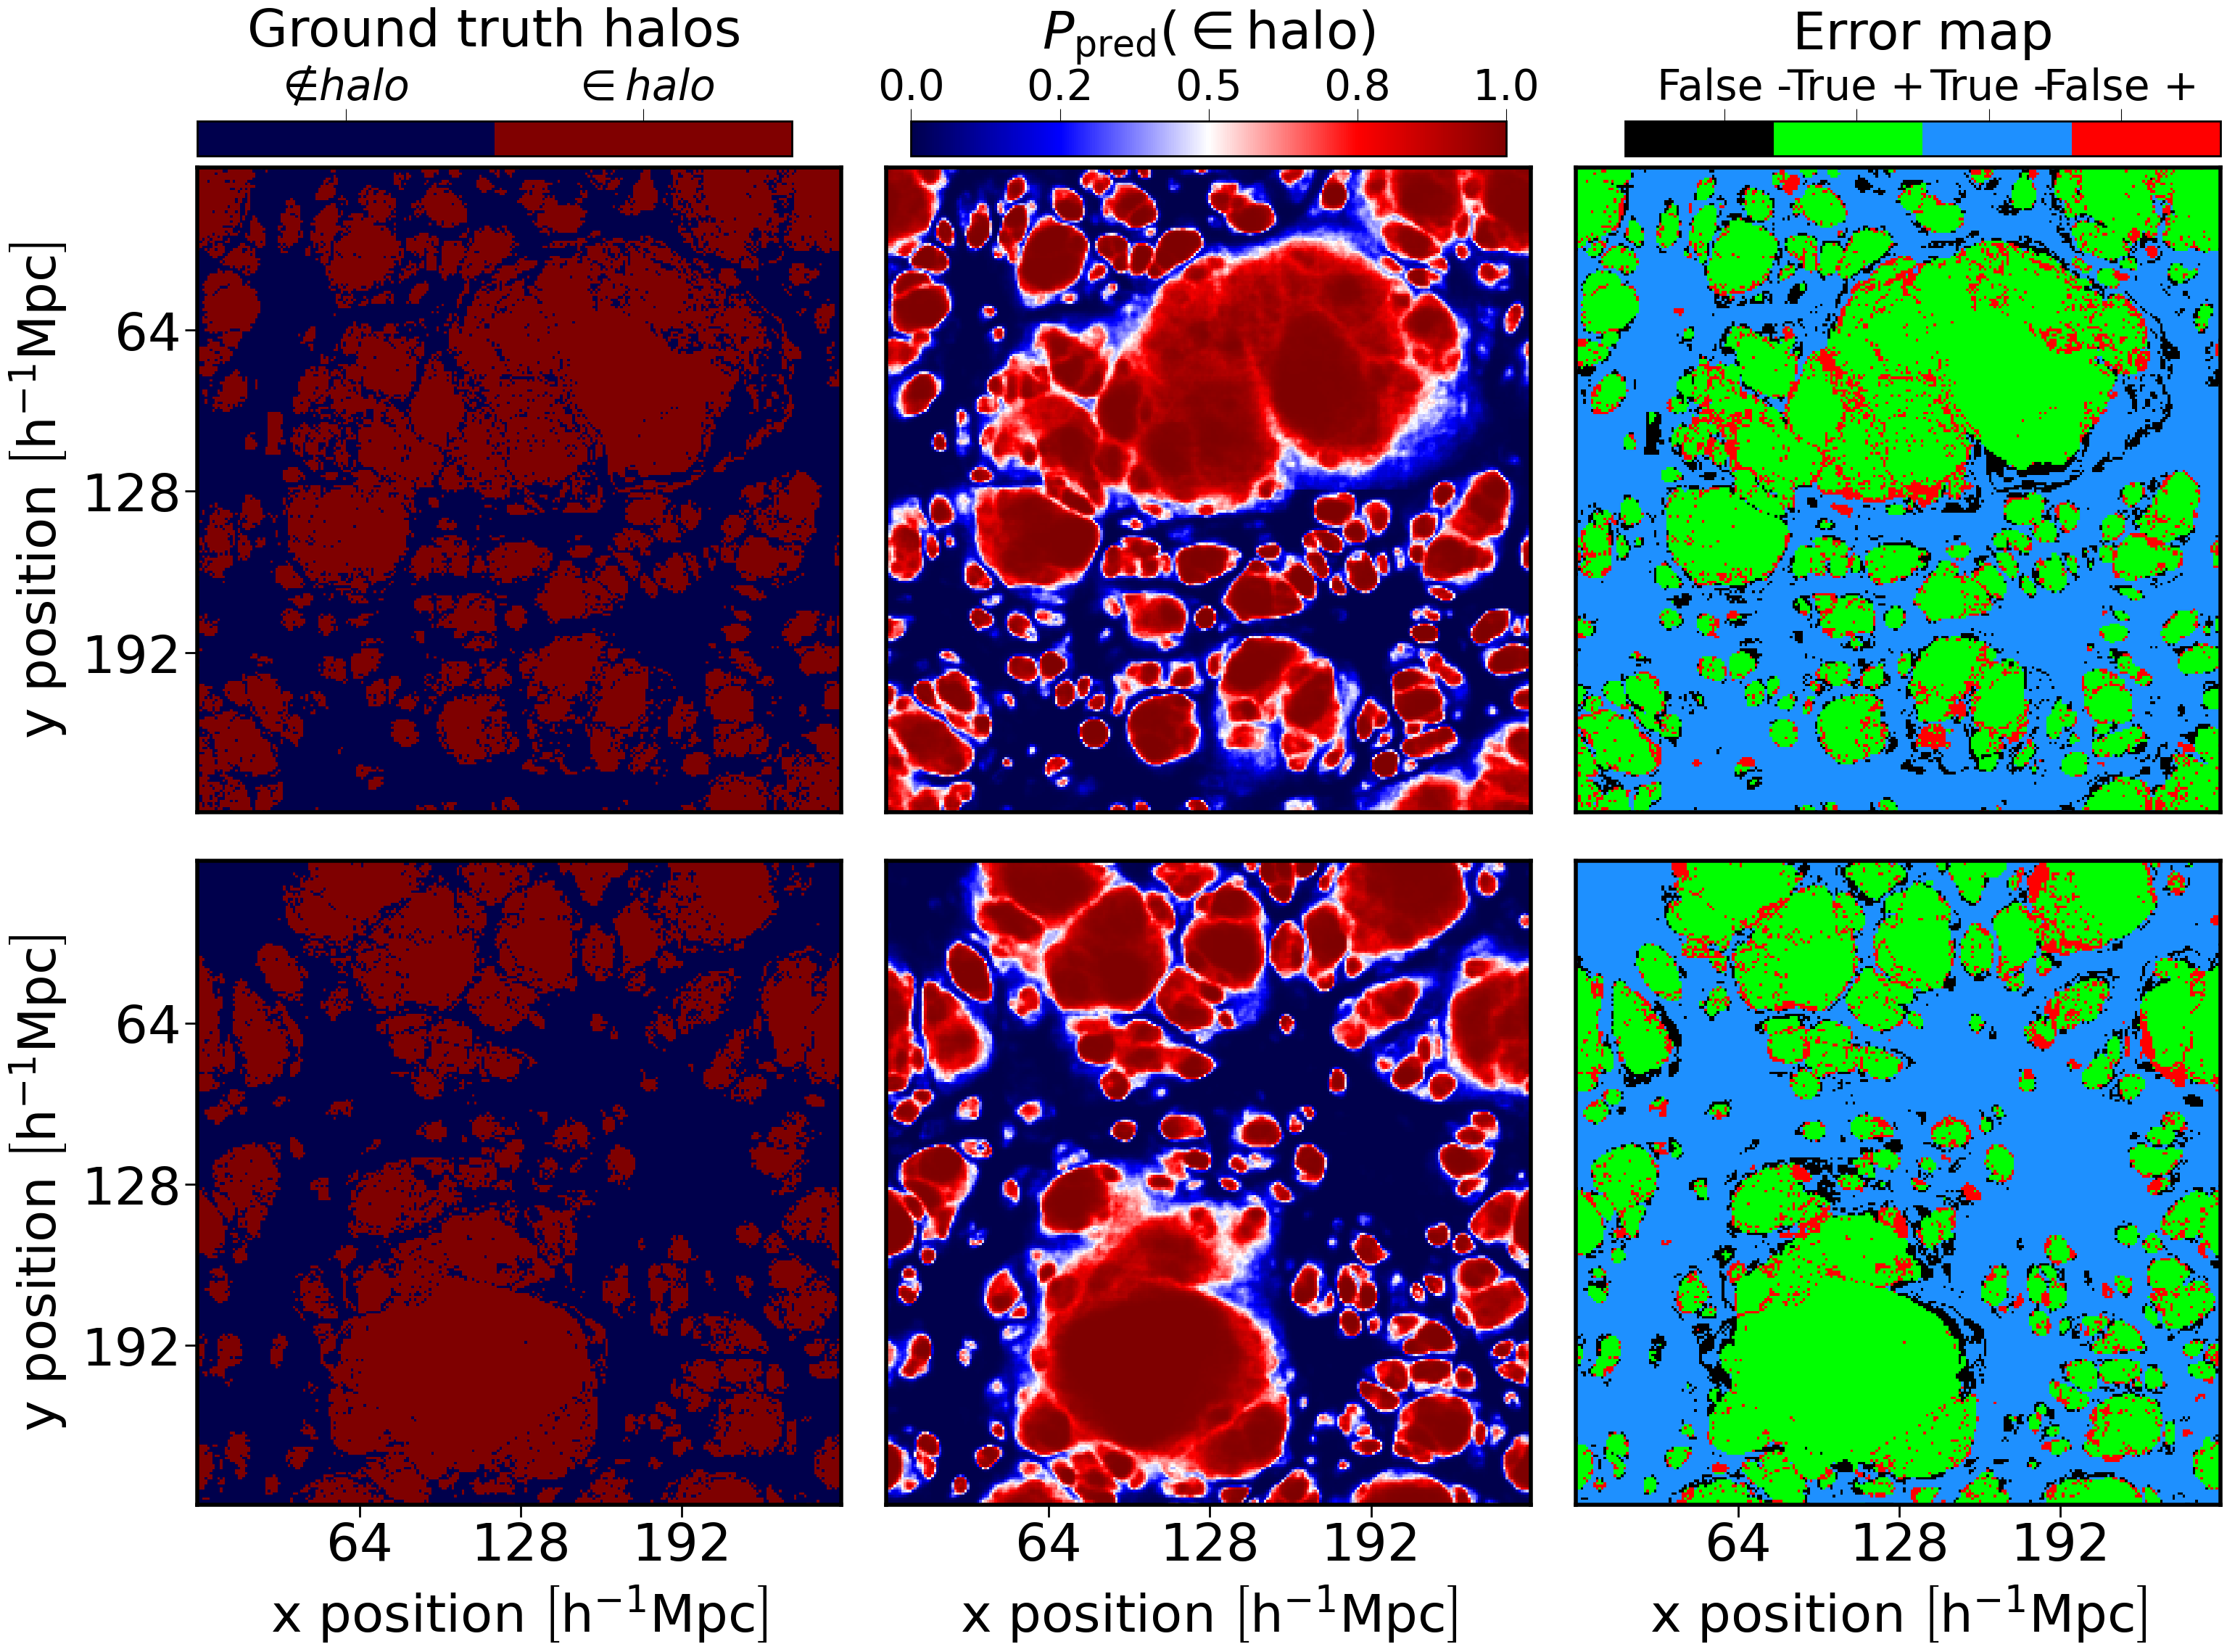

In [9]:
fig = ph.utils.plot_semantic_map_predictions(
    truth, semantic, semantic_threshold
)

### Visualize evolution of TPR predicted by the semantic netwrok as a function of $\log_{10}M_{\mathrm{True}}\; [\mathrm{h}^{-1} M_\odot]$

In [10]:
true_mass = ph.utils.compute_log10mass_map_from_label_map(truth)

In [11]:
mass_bins, TPR_vs_true_mass = ph.utils.compute_TPR_vs_true_mass(true_mass, semantic, semantic_threshold)

/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_IHs/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_IHs/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/lscratch/dlopez/Projects/instance_halos/instance_halos/utils.py:113: RuntimeWarning: invalid value encountered in long_scalars
  TPR_vs_true_mass[ii] = np.sum(TP) / P


In [12]:
%autoreload

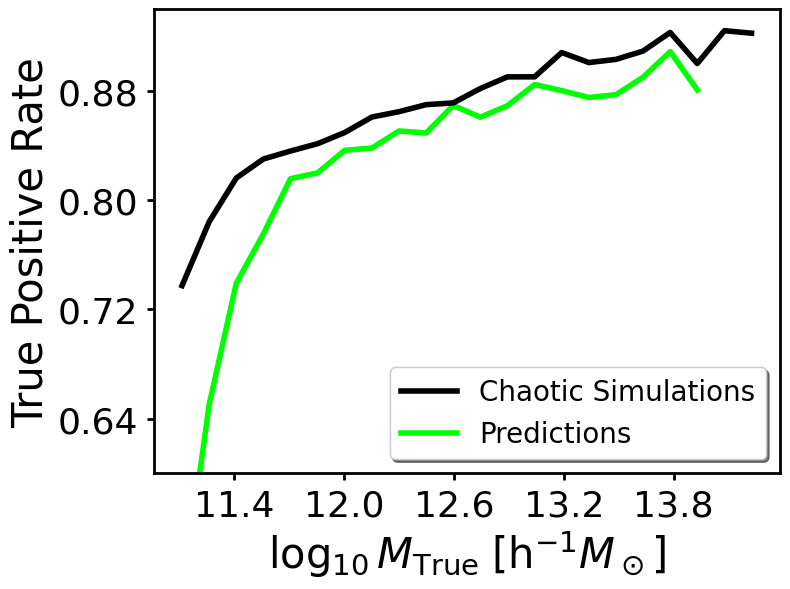

In [13]:
fig = ph.utils.plot_TPR_vs_true_mass(mass_bins, TPR_vs_true_mass)

# Evaluate instance model results

### Visualize instance predictions (mass map level)

In [14]:
pred_mass = ph.utils.compute_log10mass_map_from_label_map(instance)

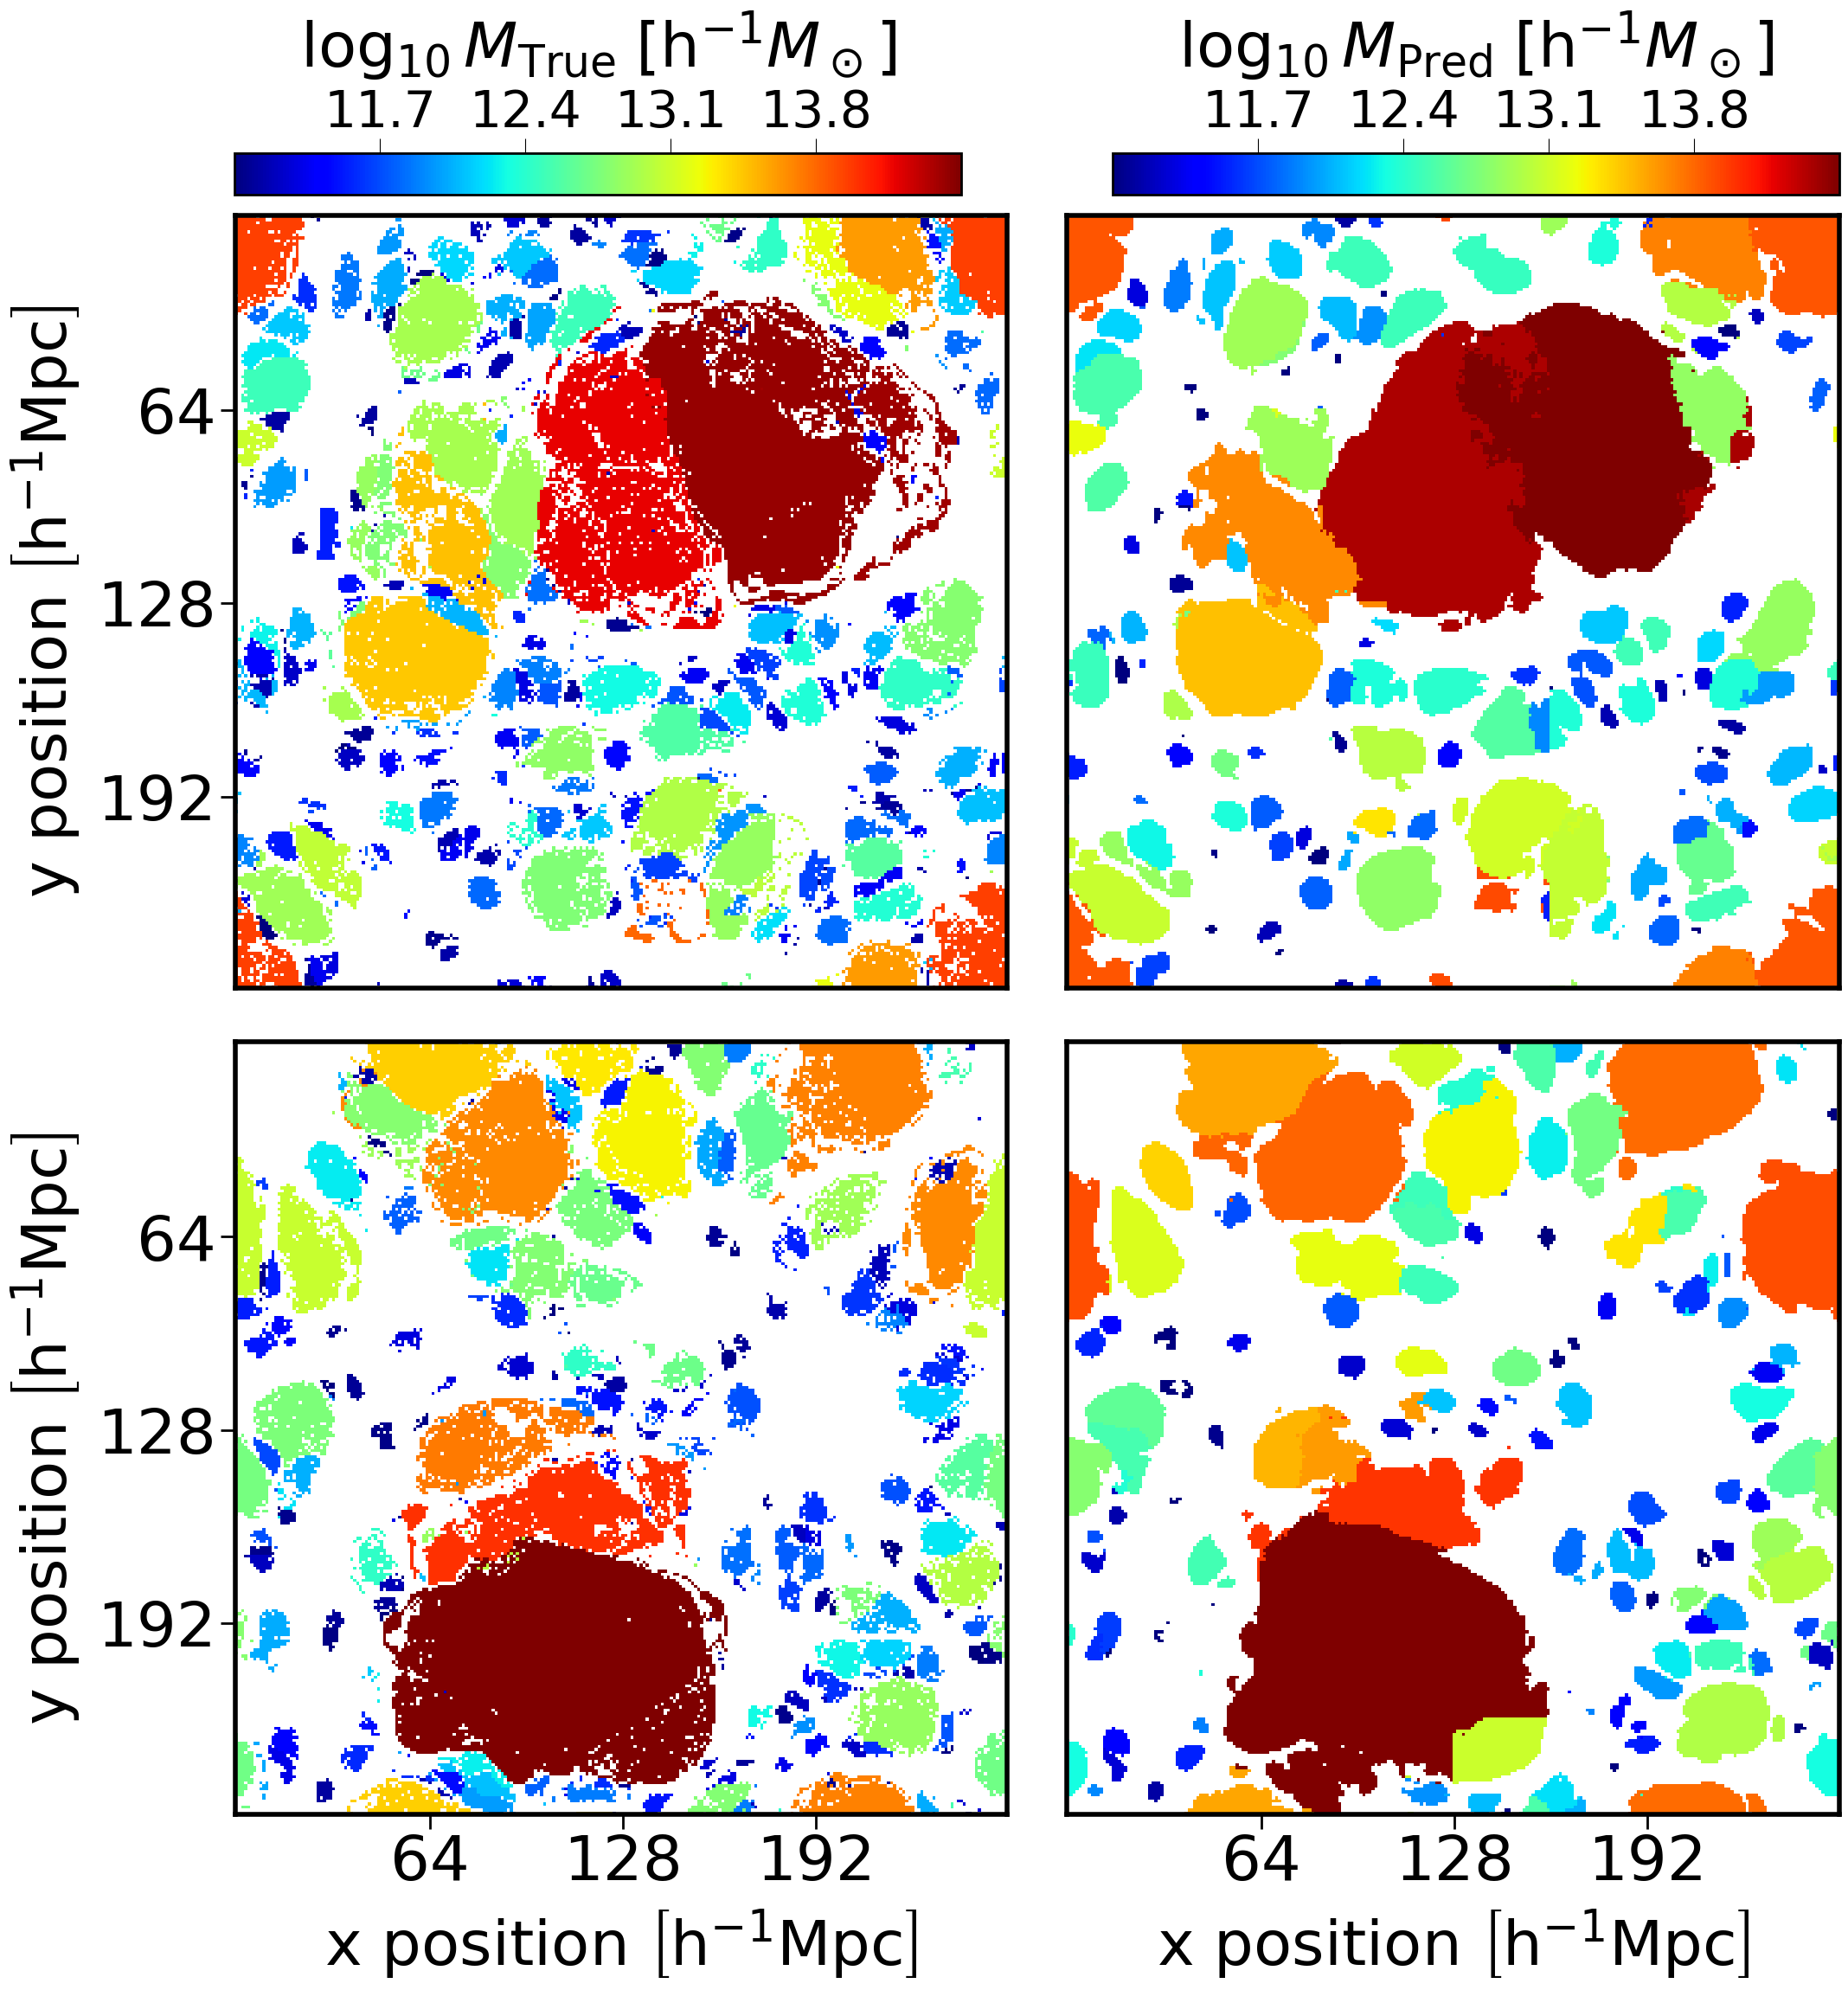

In [15]:
fig = ph.utils.plot_instance_mass_map_predictions(true_mass, pred_mass)

### Visualize violin plot

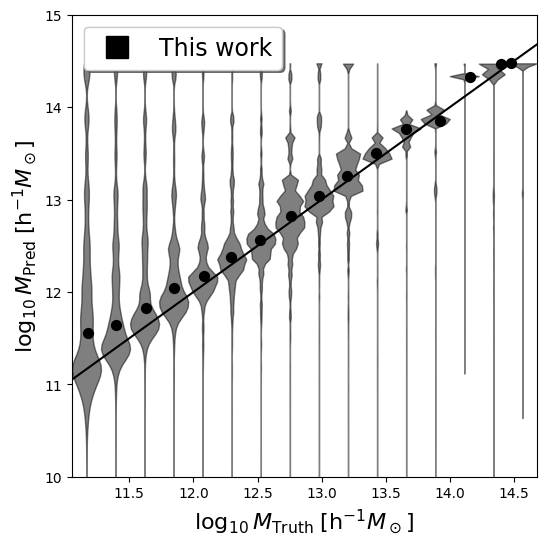

In [16]:
true_array = true_mass.flatten()
pred_array = pred_mass.flatten()

fig = ph.utils.violin_plot(true_array, pred_array, N_bins=16)

### Visualize HMF

/lscratch/dlopez/Projects/instance_halos/instance_halos/utils.py:36: RuntimeWarning: divide by zero encountered in log10
  return np.log10(np.exp(bin_centers)), np.log10(np.array(counts / np.diff(bin_edges) / volume))


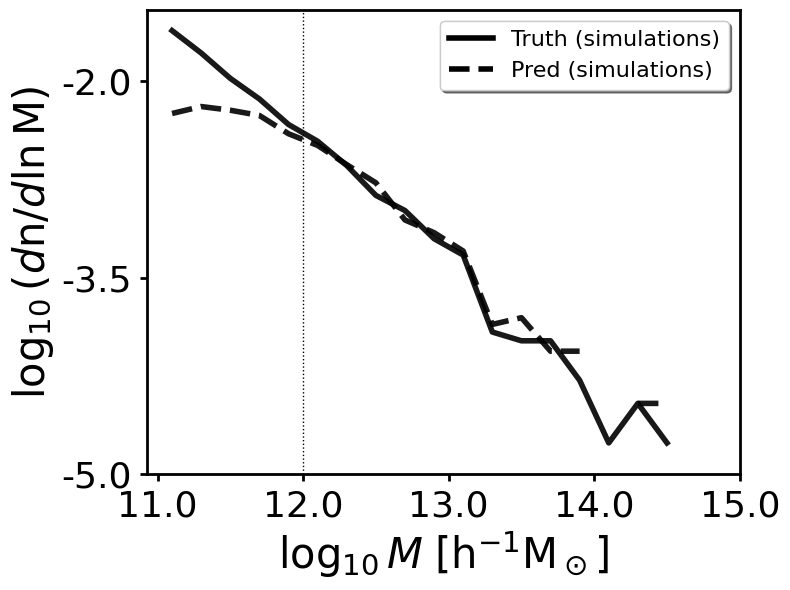

In [25]:
mp=6.350795014316703*1e8
LL = 50

M_halos_true = np.bincount(truth.flatten()) * mp
xx_true, yy_true = ph.utils.compute_HMF(M_halos_true, volume=LL**3)

M_halos_pred = np.bincount(instance.flatten()) * mp
xx_pred, yy_pred = ph.utils.compute_HMF(M_halos_pred, volume=LL**3)

fig = ph.utils.plot_HMF(xx_true, yy_true, xx_pred, yy_pred)

# Experiment density

In [19]:
LL = 50. # size of the simulation box
q = ph.utils.uniform_grid_nd(delta.shape, L=LL)
q0 = np.array(3*(LL/2,))

In [20]:
list_experiment_delta = [-0.5, 0, 0.5]
experiments_delta = {}
for ii in range(len(list_experiment_delta)):
    tmp_delta = delta + list_experiment_delta[ii]
    tmp_potential = potential + (list_experiment_delta[ii]/6)*np.linalg.norm(q-q0, axis=-1)
    tmp_semantic, tmp_instance = ph.predictions.panoptic_prediction(delta=tmp_delta, potential=tmp_potential)
    experiments_delta[ii] = ph.utils.compute_log10mass_map_from_label_map(tmp_instance)

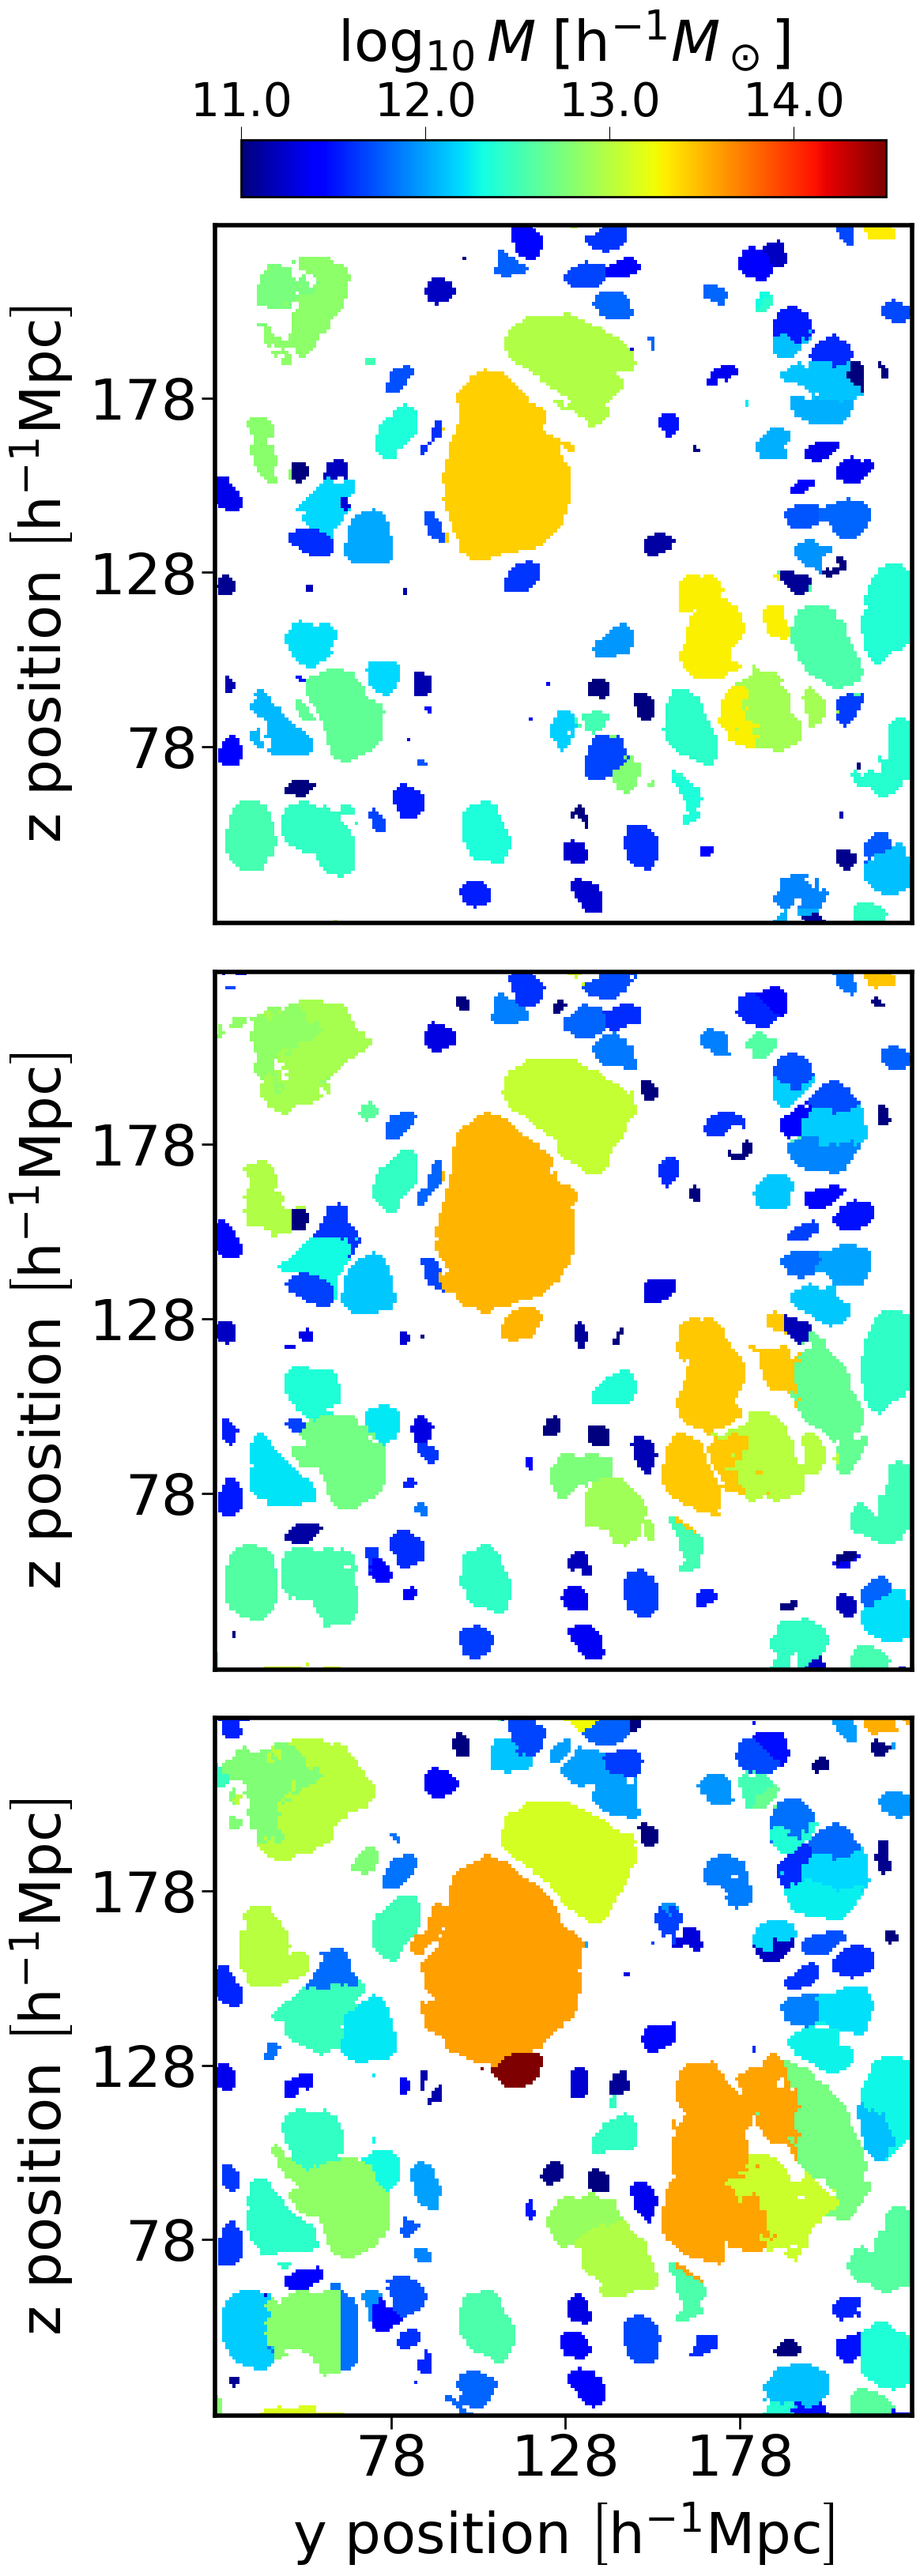

In [21]:
fig = ph.utils.plot_experiments(experiments_delta, ii_slice=180, FoV=200)

# Experiment potential

In [22]:
list_experiment_potential = [-0.5, 0, 0.5]
experiments_potential = {}
for ii in range(len(list_experiment_potential)):
    tmp_delta = delta
    tmp_potential = potential + ph.utils.tide(0, -list_experiment_potential[ii], list_experiment_potential[ii])
    tmp_semantic, tmp_instance = ph.predictions.panoptic_prediction(delta=tmp_delta, potential=tmp_potential)
    experiments_potential[ii] = ph.utils.compute_log10mass_map_from_label_map(tmp_instance)

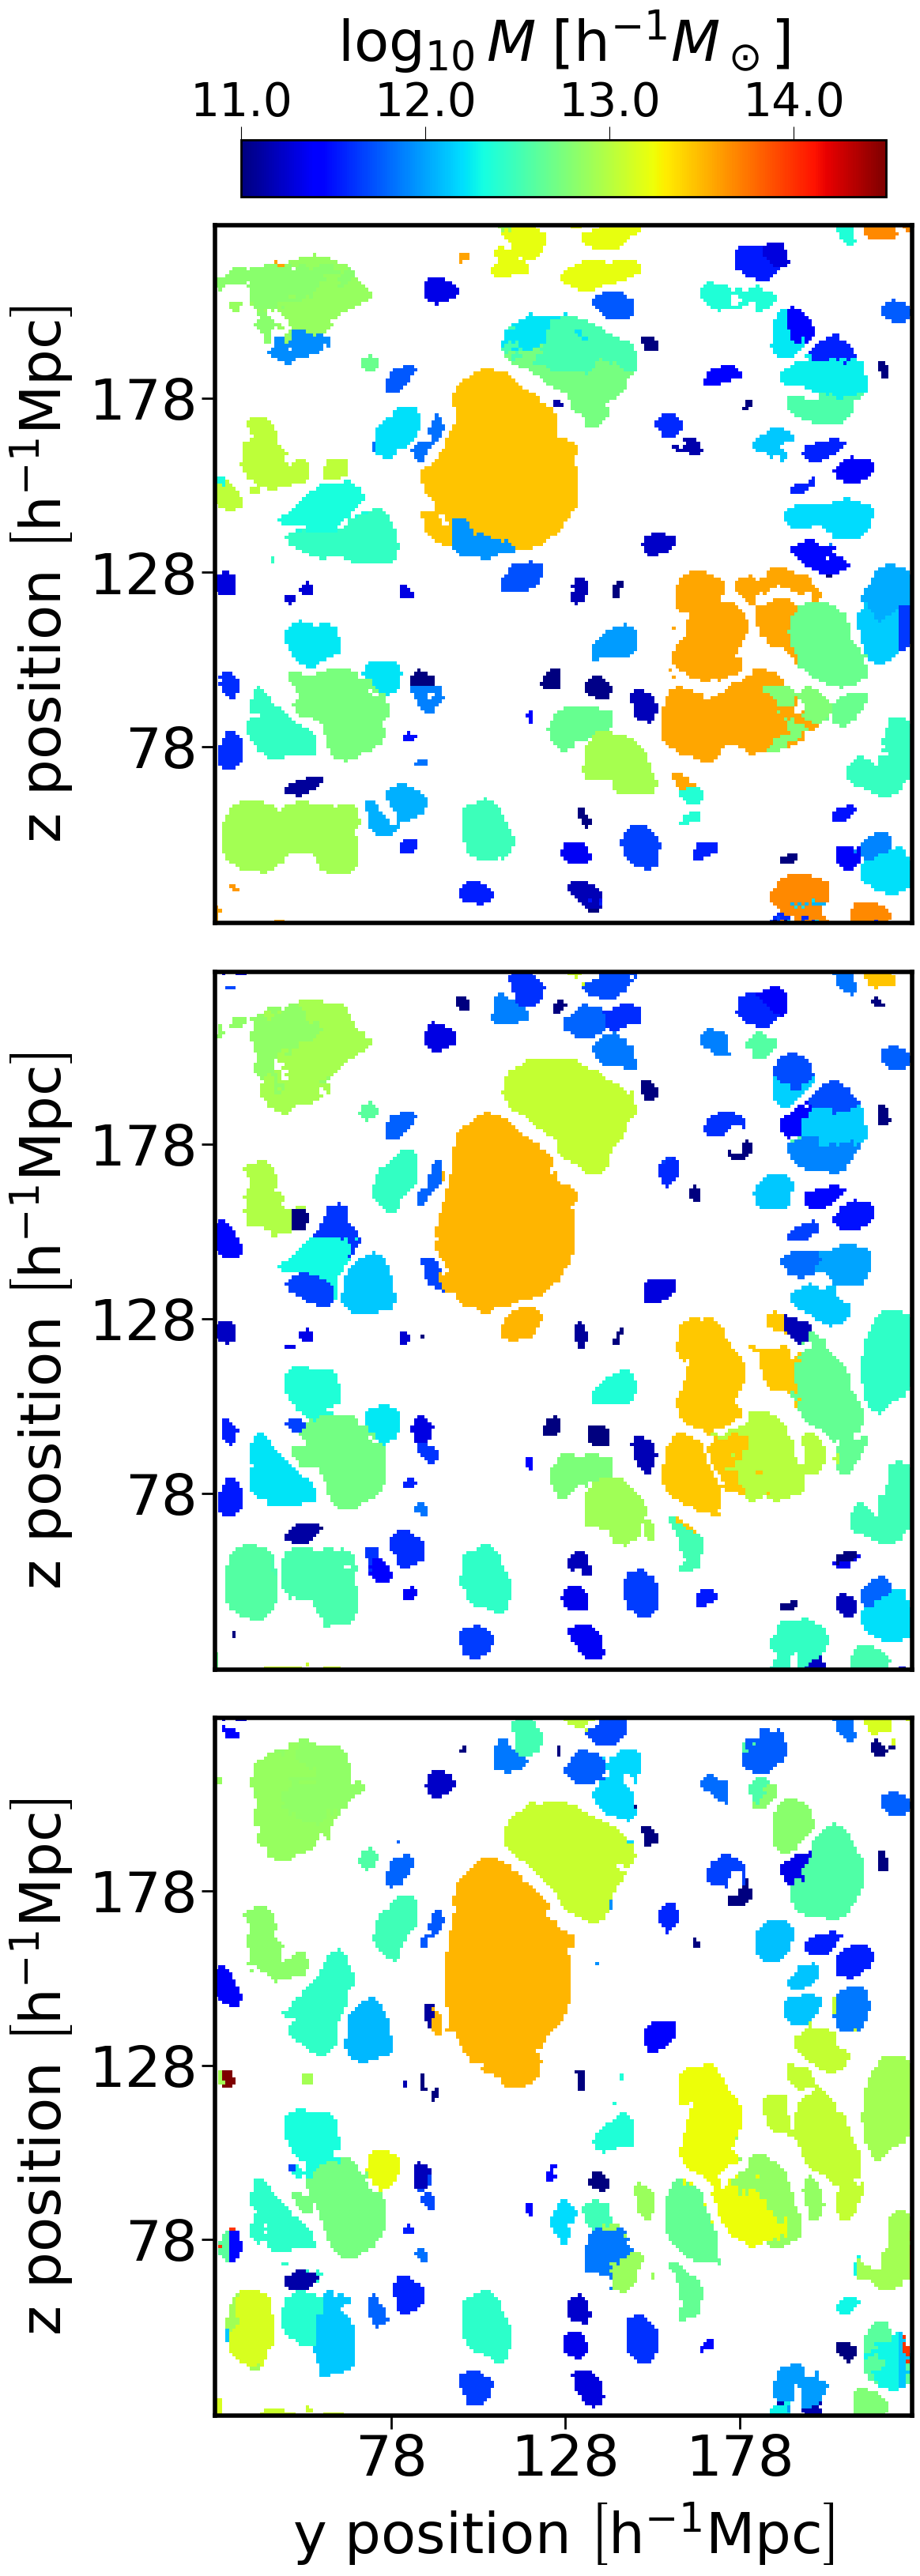

In [23]:
fig = ph.utils.plot_experiments(experiments_potential, ii_slice=180, FoV=200)